## 1. <a>Import Libraries</a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest


from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")

## 2. <a>Read Data</a>


In [2]:
df_transformed = pd.read_csv('../Data/Data_Power_MinMaxSca.csv')
df_transformed

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.181840           0.349678   0.224536          0.000000   
1     0.653869           0.598850   0.000000          0.000000   
2     0.614429           1.000000   0.400221          0.698018   
3     0.554639           0.109227   0.470156          0.753489   
4     0.460108           1.000000   0.118550          0.331321   
...        ...                ...        ...               ...   
8945  0.158494           1.000000   0.310360          0.000000   
8946  0.135028           1.000000   0.312907          0.000000   
8947  0.146543           0.383194   0.254501          0.000000   
8948  0.115792           0.383194   0.000000          0.000000   
8949  0.370191           0.133801   0.435837          0.727311   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.445536      0.000000             0.204989   
1                   0.000000      0.876605             0.000000   
2                   0.000000      0.000000             1.000000   
3                   0.000000      0.607595             0.105272   
4                   0.000000      0.000000             0.105272   
...                      ...           ...                  ...   
8945                0.556238      0.000000             1.000000   
8946                0.559242      0.000000             1.000000   
8947                0.486454      0.000000             0.862917   
8948                0.000000      0.442135             0.000000   
8949                0.000000      0.563486             0.716759   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.167033   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.307711                          0.000000   
4                       0.307711                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.918526   
8946                    0.000000                          0.918526   
8947                    0.000000                          0.817907   
8948                    0.000000                          0.000000   
8949                    0.936833                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       0.192597      0.423948   
1                   0.720633          0.689814       0.000000      0.740391   
2                   0.000000          0.000000       0.445403      0.752240   
3                   0.365866          0.389232       0.121835      0.752240   
4                   0.000000          0.000000       0.121835      0.452184   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       0.339265      0.423948   
8946                0.000000          0.000000       0.339265      0.423948   
8947                0.000000          0.000000       0.312701      0.423948   
8948                0.584752          0.545313       0.000000      0.319172   
8949                0.807730          0.545313       0.549684      0.452184   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.244633          0.509315          0.000000     1.0  
1     0.553340          0.685138          0.749712     1.0  
2     0.338795          0.640572          0.000000     1.0  
3     0.000000          0.580842          0.000000     1.0  
4     0.346965          0.559493          0.000000     1.0  
...        ...               ...               ...     ...  
8945  0.282038          0.412554          0.944352     0.0  
8946  0.268663          0.580842          0.000000     0.0  
8947  0.182881          0.461230          0.786331     0.0  
8948  0.1

In [3]:
df_transformed.describe().T

count      mean       std  min       25%  \
BALANCE                           8950.0  0.437038  0.206132  0.0  0.268678   
BALANCE_FREQUENCY                 8950.0  0.760650  0.380781  0.0  0.532578   
PURCHASES                         8950.0  0.297212  0.197475  0.0  0.167913   
ONEOFF_PURCHASES                  8950.0  0.338046  0.337900  0.0  0.000000   
INSTALLMENTS_PURCHASES            8950.0  0.329171  0.303283  0.0  0.000000   
CASH_ADVANCE                      8950.0  0.353170  0.373928  0.0  0.000000   
PURCHASES_FREQUENCY               8950.0  0.512012  0.400386  0.0  0.105272   
ONEOFF_PURCHASES_FREQUENCY        8950.0  0.342701  0.379403  0.0  0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0  0.421756  0.419913  0.0  0.000000   
CASH_ADVANCE_FREQUENCY            8950.0  0.317024  0.358968  0.0  0.000000   
CASH_ADVANCE_TRX                  8950.0  0.320404  0.353745  0.0  0.000000   
PURCHASES_TRX                     8950.0  0.328335  0.236630  0.0  0.121835   
CREDIT_LIMIT                      8950.0  0.615916  0.134688  0.0  0.497318   
PAYMENTS                          8950.0  0.378482  0.136050  0.0  0.295645   
MINIMUM_PAYMENTS                  8950.0  0.592533  0.100950  0.0  0.527550   
PRC_FULL_PAYMENT                  8950.0  0.265680  0.391944  0.0  0.000000   
TENURE                            8950.0  0.856808  0.339133  0.0  1.000000   

                                       50%       75%  max  
BALANCE                           0.468303  0.585015  1.0  
BALANCE_FREQUENCY                 1.000000  1.000000  1.0  
PURCHASES                         0.328959  0.437461  1.0  
ONEOFF_PURCHASES                  0.418298  0.672867  1.0  
INSTALLMENTS_PURCHASES            0.438710  0.603961  1.0  
CASH_ADVANCE                      0.000000  0.749156  1.0  
PURCHASES_FREQUENCY               0.559918  0.932508  1.0  
ONEOFF_PURCHASES_FREQUENCY        0.307711  0.713765  1.0  
PURCHASES_INSTALLMENTS_FREQUENCY  0.306771  0.870988  1.0  
CASH_ADVANCE_FREQUENCY            0.000000  0.682042  1.0  
CASH_ADVANCE_TRX                  0.000000  0.689814  1.0  
PURCHASES_TRX                     0.362232  0.500856  1.0  
CREDIT_LIMIT                      0.598454  0.727713  1.0  
PAYMENTS                          0.369737  0.455952  1.0  
MINIMUM_PAYMENTS                  0.580842  0.659750  1.0  
PRC_FULL_PAYMENT                  0.000000  0.600427  1.0  
TENURE                            1.000000  1.000000  1.0

## 3. <a>TSNE Visualize Data</a>


In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, 
            perplexity=20,  
            random_state=42,
            n_iter=300).fit_transform(df_transformed)

In [26]:
df_embed = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed



feature1   feature2
0     10.772959  -6.825143
1    -10.820884   2.725971
2     -2.680635  -4.832301
3      0.927297   1.552675
4    -11.420586  -2.990240
...         ...        ...
8945  -3.747708  12.697907
8946   1.183484  14.508403
8947  -1.218226  13.610560
8948  10.235308   1.534166
8949  10.178700   7.230820

[8950 rows x 2 columns]

[Text(0.5, 1.0, 'All Data')]

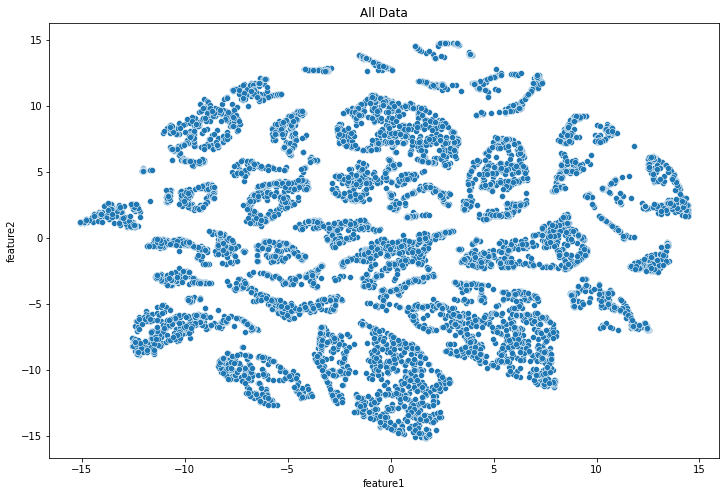

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed,    
    palette=sns.color_palette("hls", 2)
).set(title='All Data')

# Clustreing


## 1. <a>K-Means</a>


#### First, Select number of clusters (k) using Elbow Method 

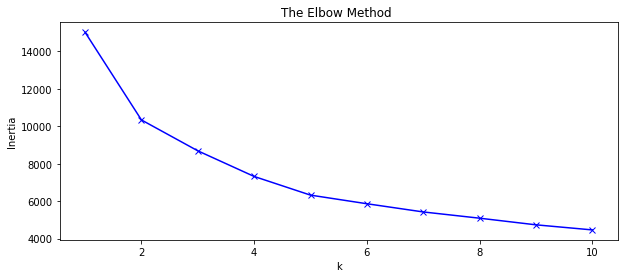

In [28]:
# To plot Elbow With Inertia 
inertia = []
Range = [*range(1,11)]

for k in Range: 
    kmean = KMeans(n_clusters=k, max_iter=300, random_state=42)
    kmean.fit(df_transformed)
    inertia.append(kmean.inertia_)
    
plt.figure(figsize=(10,4))
plt.plot(Range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method ')
plt.show()

In [29]:
# To calc. the best number of k from elbow method curve
drop_variation = []
drop_variation.append(0) #add 0 in the first element 

for i in range(len(inertia) -1):
    dropValue = inertia[i] - inertia[i+1]
    drop_variation.append(dropValue) 

# select suitable k that have large drop in the variation
k = Range[np.argmax(drop_variation)]
print("Suitable number of clusters = ",k)

Suitable number of clusters =  2


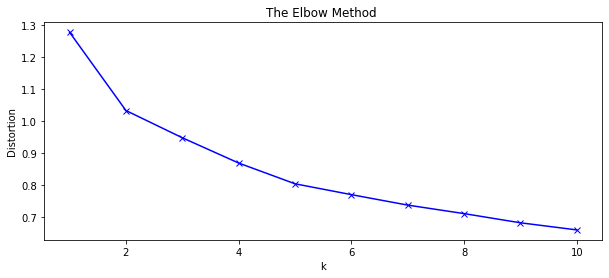

In [30]:
# To plot Elbow With Distortion 
from scipy.spatial.distance import cdist
distortions = []
Range = [*range(1,11)]

for n in Range:
    kmean = KMeans(n_clusters=n, max_iter=300, random_state=42)
    kmean.fit(df_transformed)
    distortions.append(np.average(np.min(cdist(df_transformed, kmean.cluster_centers_, 'euclidean'), axis=1)))
    
plt.figure(figsize=(10,4))
plt.plot(Range, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method ')
plt.show()

###  KMean in Sklearn

In [31]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_transformed)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 2691
sum of elements that contain in cluster 1 : 2939
sum of elements that contain in cluster 2 : 1790
sum of elements that contain in cluster 3 : 1530
--------------------------------------------------


In [32]:
# Calc. silhouette score for kmean sklearn
from sklearn.metrics import silhouette_score

score = silhouette_score(df_transformed,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.281


In [33]:
# Calc. silhoutte score for different k
for i in [*range(2,7)]:
    kmeans = KMeans(n_clusters=i, random_state=42).fit(df_transformed)
    label = kmeans.labels_
    print("For n_clusters =",i,"The average silhouette_score is :",silhouette_score(df_transformed,  label, metric='euclidean'))

For n_clusters = 2 The average silhouette_score is : 0.2935545088344612
For n_clusters = 3 The average silhouette_score is : 0.259783700619645
For n_clusters = 4 The average silhouette_score is : 0.2805968466071796
For n_clusters = 5 The average silhouette_score is : 0.28952908458404086
For n_clusters = 6 The average silhouette_score is : 0.2748561174866078


We notice that silhoutte Score will be better for 2 Clusters (k = 2)

In [34]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(df_transformed, labels)
print('Davies bouldin score: %.3f' % score)

Davies bouldin score: 1.482


The main motive is to decrease the DB index. 

In [14]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df_transformed, labels)
print('Calinski harabasz score: %.3f' % score)

Calinski harabasz score: 3136.955


##### TSNE

In [15]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1   feature2  Clusters
0    -3.966140   6.348485         2
1    -8.322732  -4.568794         0
2     0.870375  -4.185495         2
3     1.433015   2.907368         2
4    -3.761466  -1.560260         2
...        ...        ...       ...
8945 -0.498545  12.519709         1
8946 -2.551440   8.638865         1
8947 -1.795476  10.903035         1
8948  9.646295  -0.563324         0
8949  9.154241   2.406859         3

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

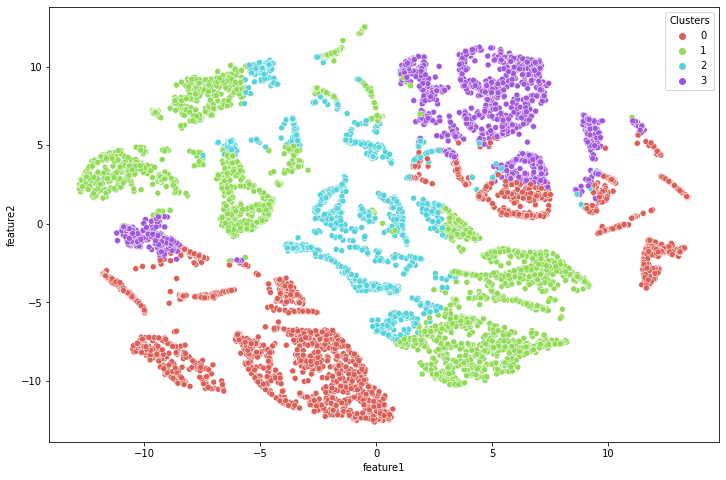

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## 2. <a>DBSCAN</a>


#### Calculate Knn-Matrix 

In [17]:
from sklearn.neighbors import NearestNeighbors
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
min_s = 10
knn = NearestNeighbors(n_neighbors=min_s+1)
knn.fit(df_transformed)
distances, neighbors = knn.kneighbors(df_transformed)

# distances ---> distance of each point to k nearest neighbours for it
# neighbors ---> index of k nearest neighbors to each poi nt

In [18]:
neighbors  # nearest neighbours for each point in data

array([[   0, 6668, 8020, ..., 1099, 5113, 2073],
       [   1, 3804, 4934, ..., 6106, 3560, 7323],
       [   2,  267, 4184, ...,  298,  346,   76],
       ...,
       [8947, 5556, 5571, ..., 4551, 5021, 8934],
       [8948, 7906,  126, ..., 1580, 3563, 1385],
       [8949, 4910,  549, ..., 6082, 2716, 8280]], dtype=int64)

In [19]:
# sort the distances, take last column only and sort them 
distances = np.sort(distances[:, -1], axis = 0) 

##### Elbow Method

Text(0.5, 1.0, 'Elbow Method for Choosing eps')

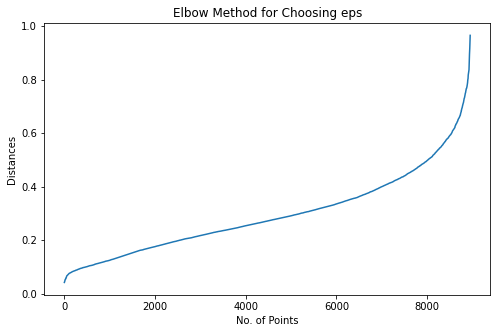

In [20]:
# plot elbow curve to choose first suitable epsilon from it
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("No. of Points")
plt.ylabel("Distances")
plt.title("Elbow Method for Choosing eps")

#### From Elbow curve we can choose epsilon that give us less noise and good clustering

In [41]:
clustering_DB_1 = DBSCAN(eps=0.65, min_samples=10).fit(df_transformed)
label_DBScan_1 = clustering_DB_1.labels_

In [42]:
pd.DataFrame(label_DBScan_1).value_counts()

 0    4078
 1    3485
 2     798
 3     528
-1      45
 4      16
dtype: int64

### Calc. Silhouette score for DBSCAN 

In [43]:
# Drop Noise points before calc. silhouette score
df_copy_1 = df_transformed.copy()
df_copy_1['Labels'] = label_DBScan_1
df_copy_1_clustered = df_copy_1.loc[(df_copy_1.Labels >= 0)] # dataframe of data without noise points 
df_copy_1_clustered_labels = df_copy_1_clustered['Labels']
df_copy_1_clustered.drop('Labels', axis=1, inplace=True)

In [44]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_copy_1_clustered, df_copy_1_clustered_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.158


In [45]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(df_copy_1_clustered, df_copy_1_clustered_labels)
print('Davies bouldin score: %.3f' % score)

Davies bouldin score: 1.825


The main motive is to decrease the DB index. 

In [46]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df_copy_1_clustered, df_copy_1_clustered_labels)
print('Calinski harabasz score: %.3f' % score)

Calinski harabasz score: 1315.088


##### TSNE

In [47]:
df_embed_dbscan = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_dbscan['Clusters']= pd.DataFrame(label_DBScan_1)
df_embed_dbscan

feature1   feature2  Clusters
0     10.772959  -6.825143         0
1    -10.820884   2.725971         1
2     -2.680635  -4.832301         0
3      0.927297   1.552675         1
4    -11.420586  -2.990240         0
...         ...        ...       ...
8945  -3.747708  12.697907         3
8946   1.183484  14.508403         3
8947  -1.218226  13.610560         3
8948  10.235308   1.534166         2
8949  10.178700   7.230820         2

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

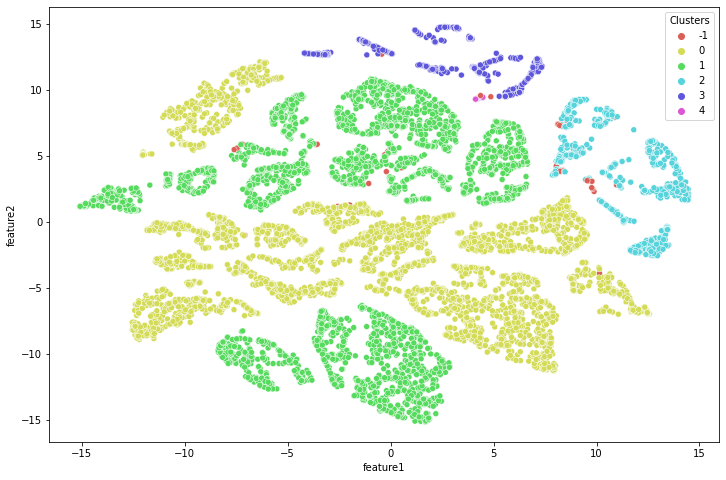

In [49]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_dbscan,    
    hue=df_embed_dbscan['Clusters'],
    palette=sns.color_palette("hls", 6)
)


## 3. <a>hierarchical</a>


##### Dendrogram

Text(20, 45, 'Cut off')

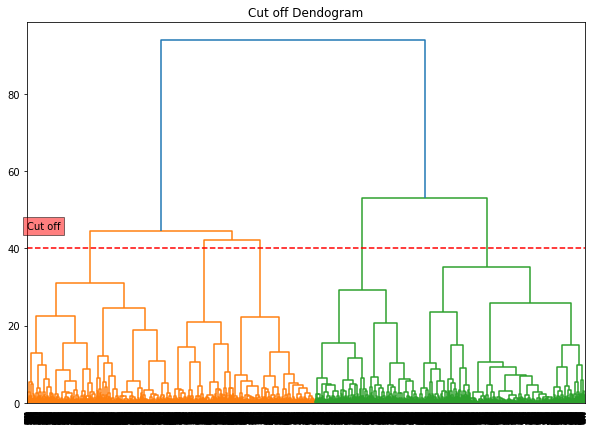

In [53]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Cut off Dendogram")
dend = shc.dendrogram(shc.linkage(y=df_transformed , method='ward',metric='euclidean'))
plt.axhline(y=40, color='r', linestyle='--')
plt.text(20, 45, "Cut off", bbox=dict(facecolor='red', alpha=0.5))

* From Dendrogram will take 5 clusters

In [54]:
from sklearn.cluster import AgglomerativeClustering

clustering_Agg = AgglomerativeClustering(n_clusters=5).fit(df_transformed)
hier_labels = clustering_Agg.labels_
hier_labels


array([1, 0, 4, ..., 1, 0, 0], dtype=int64)

#### Silhouette score for Hiererichal 

In [55]:
# Calc. silhouette score for hiereichal cluster
from sklearn.metrics import silhouette_score

score = silhouette_score(df_transformed,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.215


In [56]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(df_transformed, hier_labels)
print('Davies bouldin score: %.3f' % score)

Davies bouldin score: 1.521


The main motive is to decrease the DB index. 

In [57]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df_transformed, hier_labels)
print('Calinski harabasz score: %.3f' % score)

Calinski harabasz score: 2338.136


##### TSNE

In [58]:
df_embed_hier = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_hier['Clusters']= pd.DataFrame(hier_labels)
df_embed_hier

feature1   feature2  Clusters
0     10.772959  -6.825143         1
1    -10.820884   2.725971         0
2     -2.680635  -4.832301         4
3      0.927297   1.552675         0
4    -11.420586  -2.990240         4
...         ...        ...       ...
8945  -3.747708  12.697907         1
8946   1.183484  14.508403         1
8947  -1.218226  13.610560         1
8948  10.235308   1.534166         0
8949  10.178700   7.230820         0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

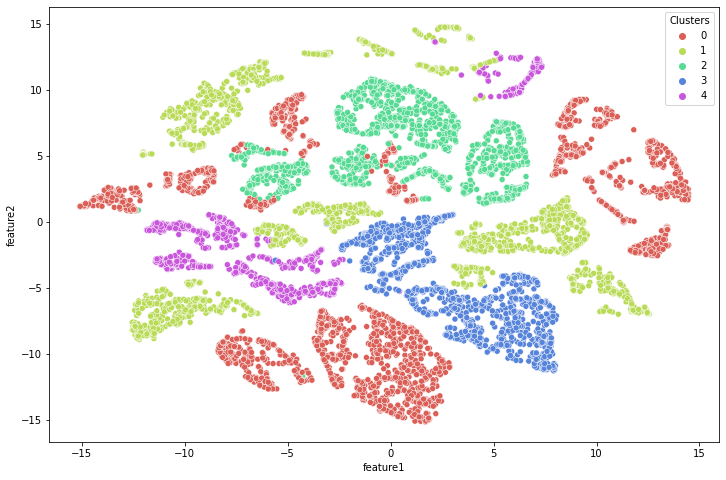

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_hier,    
    hue=df_embed_hier['Clusters'],
    palette=sns.color_palette("hls", 5)
)


Not Good Clastering

# Anomaly Detection

## 1. <a>Isolated Random Forest</a>


In [60]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_transformed)

anom_pred = clf.predict(df_transformed)
anom_pred

array([ 1,  1,  1, ...,  1, -1, -1])

In [61]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [62]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1   feature2  Labels
0     10.772959  -6.825143       1
1    -10.820884   2.725971       1
2     -2.680635  -4.832301       1
3      0.927297   1.552675       1
4    -11.420586  -2.990240       1
...         ...        ...     ...
8945  -3.747708  12.697907       1
8946   1.183484  14.508403       1
8947  -1.218226  13.610560       1
8948  10.235308   1.534166      -1
8949  10.178700   7.230820      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

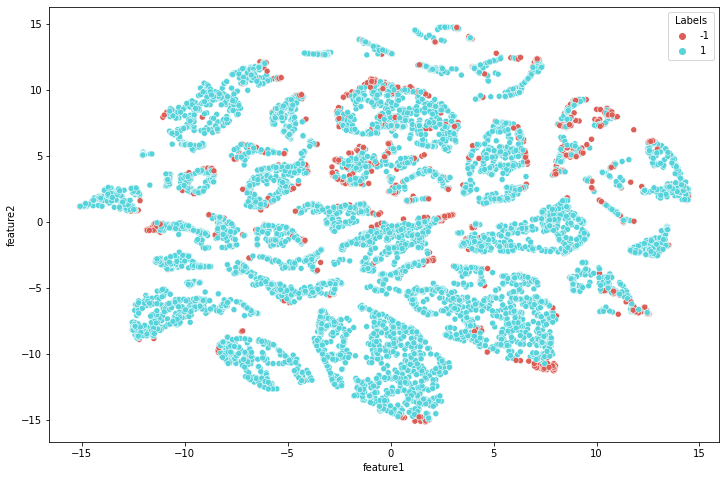

In [63]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM</a>


In [64]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_transformed)

In [65]:
scores = gm.score_samples(df_transformed)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [66]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1   feature2  Labels
0     10.772959  -6.825143       1
1    -10.820884   2.725971       1
2     -2.680635  -4.832301       1
3      0.927297   1.552675      -1
4    -11.420586  -2.990240       1
...         ...        ...     ...
8945  -3.747708  12.697907       1
8946   1.183484  14.508403       1
8947  -1.218226  13.610560       1
8948  10.235308   1.534166       1
8949  10.178700   7.230820      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

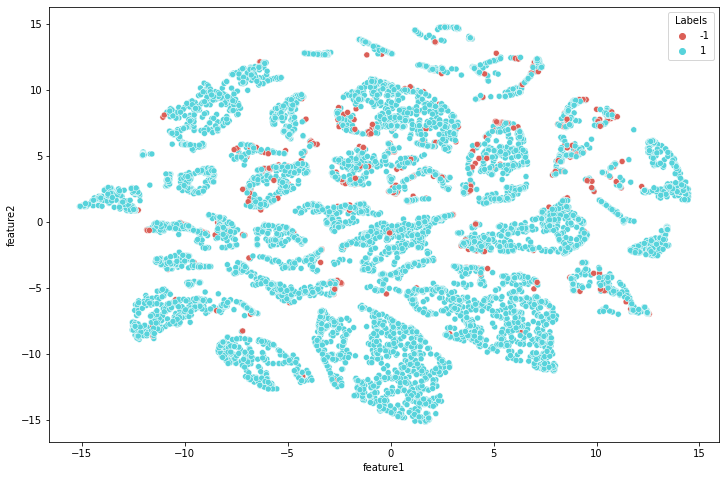

In [67]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN</a>


In [68]:
DB = DBSCAN(eps=0.65, min_samples=17).fit(df_transformed)
label_DBScan = DB.labels_

In [69]:
pd.DataFrame(label_DBScan).value_counts()

 0    4078
 1    3449
 2     755
 3     524
-1     144
dtype: int64

##### TSNE

In [70]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(label_DBScan)
df_embed_Iso

feature1   feature2  Labels
0     10.772959  -6.825143       0
1    -10.820884   2.725971       1
2     -2.680635  -4.832301       0
3      0.927297   1.552675       1
4    -11.420586  -2.990240       0
...         ...        ...     ...
8945  -3.747708  12.697907       3
8946   1.183484  14.508403       3
8947  -1.218226  13.610560       3
8948  10.235308   1.534166       2
8949  10.178700   7.230820       2

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

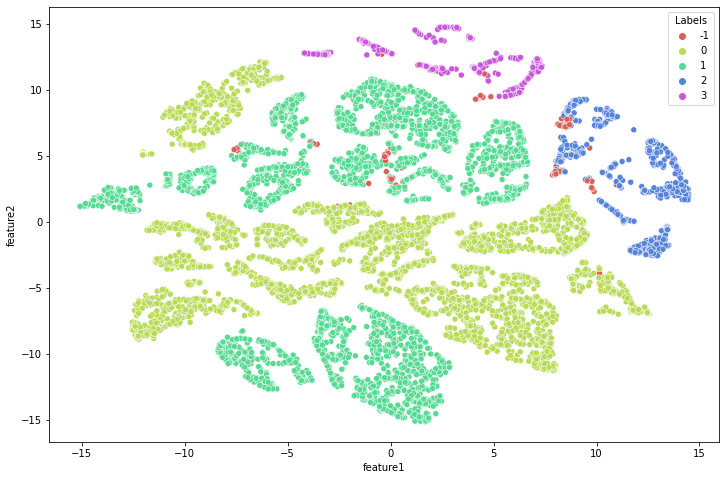

In [72]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 5)
)


DBSCAN Good Clusetring here

# Dimensionality Reduction


## 1.<a> PCA </a>
#### Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
df_pca=pd.DataFrame(pca.fit_transform(df_transformed))
df_pca.shape

(8950, 7)

In [74]:
df_pca

0         1         2         3         4         5         6
0    -0.082254 -0.897237 -0.054580 -0.377550  0.138645 -0.278595 -0.038627
1    -1.106156 -0.156536  0.200282  0.389841 -0.617446  0.004683  0.262122
2     0.477634  0.304870 -0.903132 -0.398536  0.037211  0.174240 -0.149995
3    -0.586049 -0.176515 -0.640394  0.137729  0.132629 -0.556681  0.068257
4    -0.244633 -0.422092 -0.513093 -0.658086 -0.085239  0.251247 -0.014746
...        ...       ...       ...       ...       ...       ...       ...
8945  0.787256 -0.567365  0.692541  0.392399  0.269153  0.906120 -0.140111
8946  0.591292 -0.375985  0.604649 -0.171435  0.877264  0.589941 -0.198503
8947  0.605391 -0.876084  0.501117  0.559947  0.489280  0.473123 -0.107392
8948 -0.882018 -0.817891  0.073576  0.800522  0.172903  0.543231 -0.219557
8949 -0.321872  0.294530 -0.706281  0.884681  0.870693 -0.034668 -0.389321

[8950 rows x 7 columns]

## 2. <a> Kernal-PCA </a>
#### Non-linear dimensionality reduction through the use of kernels 

In [75]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=10, kernel='rbf')
df_kpca = pd.DataFrame(kpca.fit_transform(df_transformed))
df_kpca

0         1         2         3         4         5         6  \
0     0.020933 -0.286019 -0.024758 -0.115258  0.058172 -0.100341 -0.023191   
1     0.343249 -0.049772  0.065220  0.116729 -0.181867 -0.011062  0.084586   
2    -0.147975  0.096916 -0.289058 -0.119193  0.005185  0.057210 -0.054062   
3     0.180809 -0.059702 -0.199264  0.049067  0.056381 -0.167373 -0.004256   
4     0.077019 -0.135337 -0.171156 -0.211020 -0.028311  0.066091 -0.027761   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.238204 -0.169222  0.214145  0.115200  0.057526  0.281150 -0.071374   
8946 -0.183439 -0.113569  0.184753 -0.057613  0.254141  0.198396 -0.072609   
8947 -0.188139 -0.264361  0.157267  0.170246  0.137765  0.158844 -0.054862   
8948  0.257719 -0.238729  0.022220  0.244504  0.061592  0.165904 -0.033679   
8949  0.092439  0.088236 -0.202945  0.270168  0.265526  0.023396 -0.122617   

             7         8         9  
0     0.013289 -0.048549  0.013317  
1     0.017170  0.045170  0.060867  
2    -0.015585  0.168464  0.020284  
3     0.044347 -0.023067 -0.022181  
4     0.029109 -0.041219  0.034176  
...        ...       ...       ...  
8945  0.019763 -0.007242 -0.010788  
8946 -0.008934  0.013151 -0.002407  
8947  0.019447  0.009398 -0.023855  
8948 -0.055313 -0.064012  0.061646  
8949 -0.029980  0.068399 -0.034525  

[8950 rows x 10 columns]

# Clustering + PCA

## KMean + PCA

In [76]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_pca)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 2695
sum of elements that contain in cluster 1 : 1792
sum of elements that contain in cluster 2 : 1526
sum of elements that contain in cluster 3 : 2937
--------------------------------------------------


In [77]:
score = silhouette_score(df_pca,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.298


Using PCA made Silhoutte score increase

In [78]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1   feature2  Clusters
0     10.772959  -6.825143         1
1    -10.820884   2.725971         0
2     -2.680635  -4.832301         1
3      0.927297   1.552675         1
4    -11.420586  -2.990240         1
...         ...        ...       ...
8945  -3.747708  12.697907         3
8946   1.183484  14.508403         3
8947  -1.218226  13.610560         3
8948  10.235308   1.534166         0
8949  10.178700   7.230820         2

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

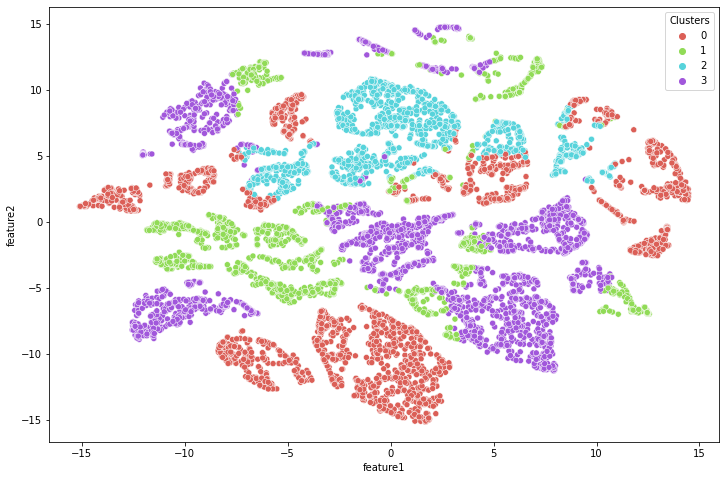

In [79]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## DBSCAN + PCA

In [80]:
# when we use PCA with DBSCAN with same epsilon can notice that classes become 2 and noise points decrease
clustering_DB_1 = DBSCAN(eps=0.65, min_samples=10).fit(df_pca)
label_DBScan_1 = clustering_DB_1.labels_

In [81]:
pd.DataFrame(label_DBScan_1).value_counts()

 0    7584
 1     810
 2     547
-1       9
dtype: int64

## Hierarchical + PCA

In [82]:
clustering_Agg = AgglomerativeClustering(n_clusters=5).fit(df_pca)
hier_labels = clustering_Agg.labels_
hier_labels


array([3, 2, 4, ..., 3, 2, 0], dtype=int64)

In [83]:

score = silhouette_score(df_pca,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.260


In [84]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(hier_labels)
df_embed_kmeans

feature1   feature2  Clusters
0     10.772959  -6.825143         3
1    -10.820884   2.725971         2
2     -2.680635  -4.832301         4
3      0.927297   1.552675         2
4    -11.420586  -2.990240         4
...         ...        ...       ...
8945  -3.747708  12.697907         3
8946   1.183484  14.508403         3
8947  -1.218226  13.610560         3
8948  10.235308   1.534166         2
8949  10.178700   7.230820         0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

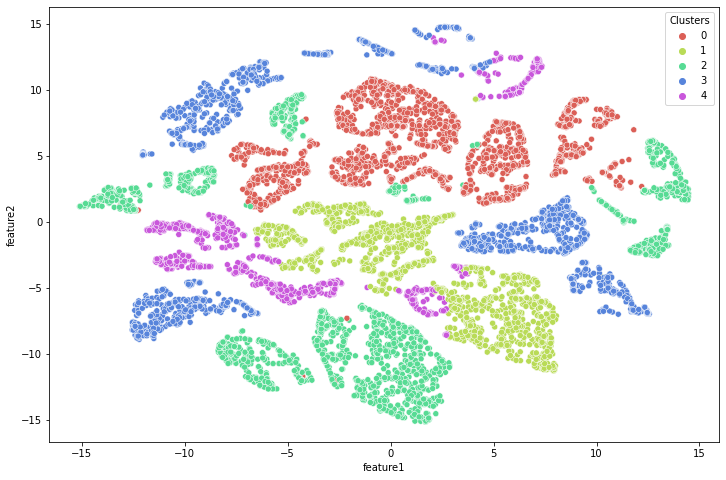

In [85]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 5)
)

# Anomaly Detection + PCA

## 1. <a>Isolated Random Forest + PCA </a>


In [86]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_pca)

anom_pred = clf.predict(df_pca)
anom_pred

array([ 1,  1,  1, ..., -1, -1, -1])

In [87]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [88]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1   feature2  Labels
0     10.772959  -6.825143       1
1    -10.820884   2.725971       1
2     -2.680635  -4.832301       1
3      0.927297   1.552675       1
4    -11.420586  -2.990240       1
...         ...        ...     ...
8945  -3.747708  12.697907      -1
8946   1.183484  14.508403      -1
8947  -1.218226  13.610560      -1
8948  10.235308   1.534166      -1
8949  10.178700   7.230820      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

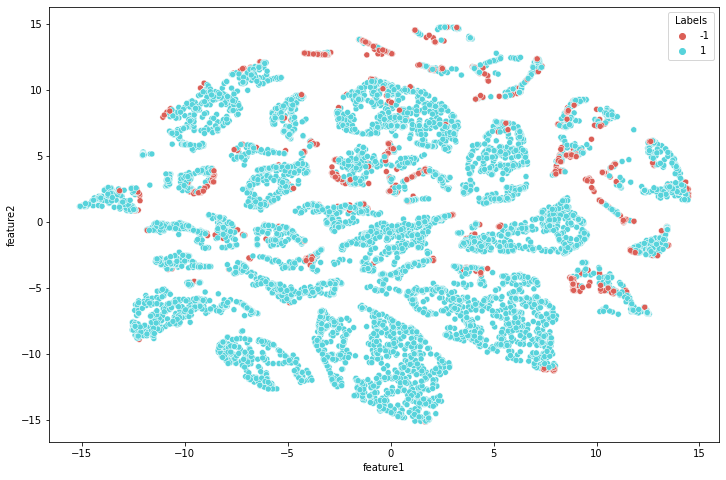

In [89]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM + PCA</a>


In [90]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_pca)

In [91]:
scores = gm.score_samples(df_pca)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [92]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1   feature2  Labels
0     10.772959  -6.825143       1
1    -10.820884   2.725971       1
2     -2.680635  -4.832301       1
3      0.927297   1.552675       1
4    -11.420586  -2.990240       1
...         ...        ...     ...
8945  -3.747708  12.697907      -1
8946   1.183484  14.508403      -1
8947  -1.218226  13.610560       1
8948  10.235308   1.534166       1
8949  10.178700   7.230820      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

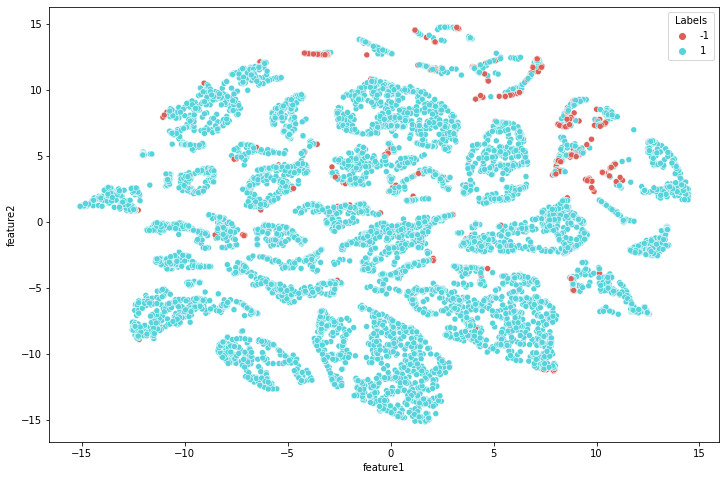

In [93]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN + PCA</a>


In [94]:
DB = DBSCAN(eps=0.65, min_samples=10).fit(df_pca)
label_DBScan = DB.labels_

In [95]:
pd.DataFrame(label_DBScan).value_counts()

 0    7584
 1     810
 2     547
-1       9
dtype: int64

Can notice that using DBSAN with same epsilon with PCA give us less number of noise points.

##### TSNE

In [96]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(label_DBScan)
df_embed_Iso

feature1   feature2  Labels
0     10.772959  -6.825143       0
1    -10.820884   2.725971       0
2     -2.680635  -4.832301       0
3      0.927297   1.552675       0
4    -11.420586  -2.990240       0
...         ...        ...     ...
8945  -3.747708  12.697907       2
8946   1.183484  14.508403       2
8947  -1.218226  13.610560       2
8948  10.235308   1.534166       1
8949  10.178700   7.230820       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

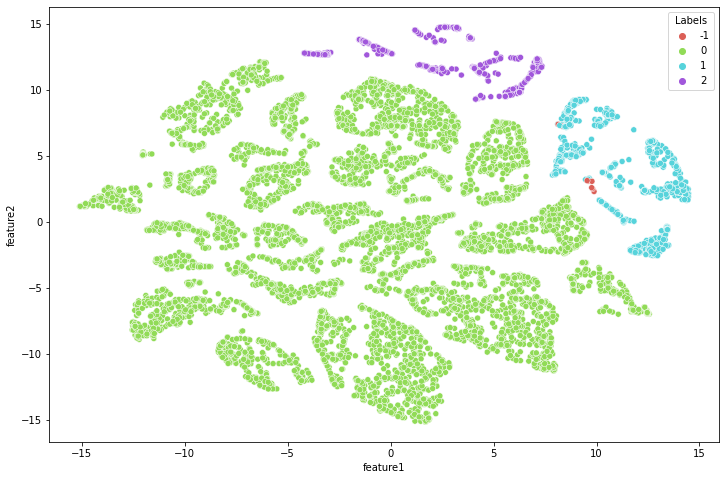

In [97]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 4)
)


DBSCAN Good Clustering here

# Clustering + KernalPCA

## KMean + KernalPCA

In [98]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_kpca)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 1553
sum of elements that contain in cluster 1 : 1798
sum of elements that contain in cluster 2 : 2660
sum of elements that contain in cluster 3 : 2939
--------------------------------------------------


In [99]:
score = silhouette_score(df_kpca,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.294


In [100]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1   feature2  Clusters
0     10.772959  -6.825143         1
1    -10.820884   2.725971         2
2     -2.680635  -4.832301         1
3      0.927297   1.552675         1
4    -11.420586  -2.990240         1
...         ...        ...       ...
8945  -3.747708  12.697907         3
8946   1.183484  14.508403         3
8947  -1.218226  13.610560         3
8948  10.235308   1.534166         2
8949  10.178700   7.230820         0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

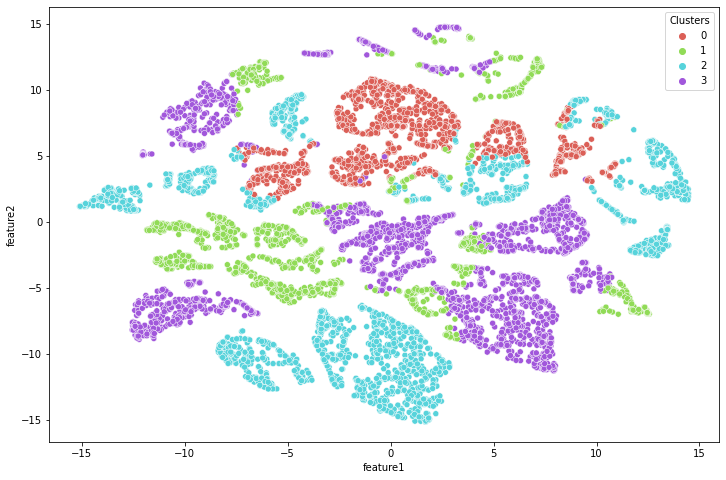

In [101]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## Hierarchical + KernalPCA

In [102]:
clustering_Agg = AgglomerativeClustering(n_clusters=5).fit(df_kpca)
hier_labels = clustering_Agg.labels_
hier_labels


array([1, 2, 3, ..., 1, 2, 0], dtype=int64)

In [103]:

score = silhouette_score(df_kpca,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.263


In [104]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(hier_labels)
df_embed_kmeans

feature1   feature2  Clusters
0     10.772959  -6.825143         1
1    -10.820884   2.725971         2
2     -2.680635  -4.832301         3
3      0.927297   1.552675         2
4    -11.420586  -2.990240         3
...         ...        ...       ...
8945  -3.747708  12.697907         1
8946   1.183484  14.508403         1
8947  -1.218226  13.610560         1
8948  10.235308   1.534166         2
8949  10.178700   7.230820         0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

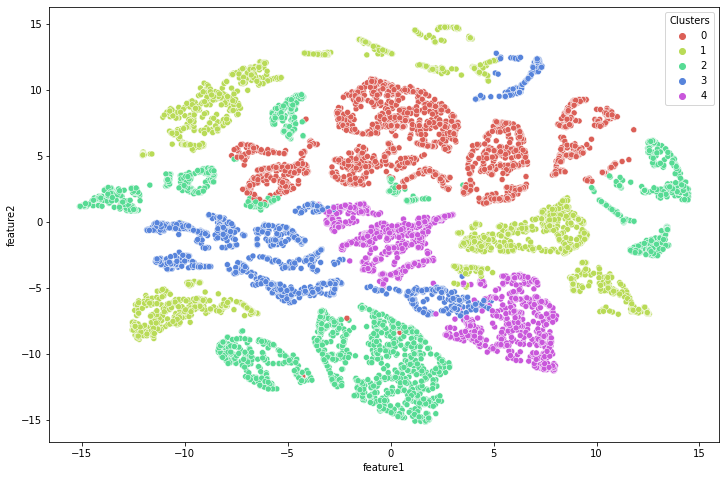

In [107]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 5)
)

## DBSCAN + KernalPCA

In [113]:
clustering_DB_1 = DBSCAN(eps=0.65, min_samples=10).fit(df_kpca)
label_DBScan_1 = clustering_DB_1.labels_

In [111]:
pd.DataFrame(label_DBScan_1).value_counts()

0    8950
dtype: int64

Same epsilon not give noise points at this case rather than result without using any dimensionality reduction or using PCA.

# Anomaly Detection + KernalPCA

## 1. <a>Isolated Random Forest + KernalPCA</a>


In [114]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_kpca)

anom_pred = clf.predict(df_kpca)
anom_pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [115]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [116]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1   feature2  Labels
0     10.772959  -6.825143       1
1    -10.820884   2.725971       1
2     -2.680635  -4.832301       1
3      0.927297   1.552675       1
4    -11.420586  -2.990240       1
...         ...        ...     ...
8945  -3.747708  12.697907       1
8946   1.183484  14.508403      -1
8947  -1.218226  13.610560       1
8948  10.235308   1.534166       1
8949  10.178700   7.230820      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

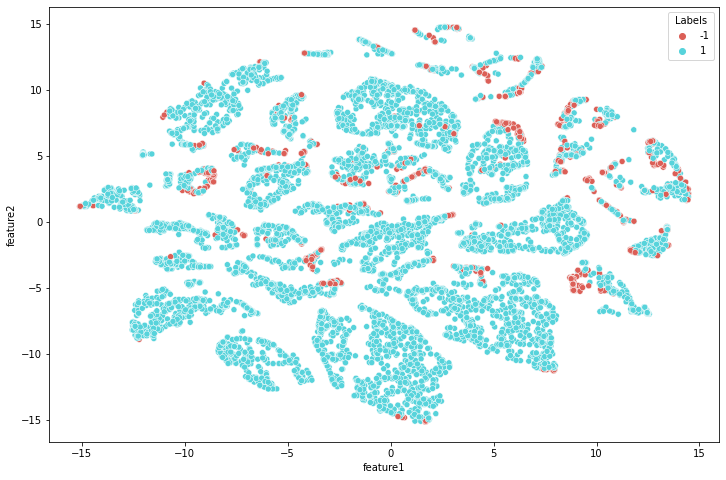

In [117]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM + KernalPCA</a>


In [118]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_kpca)

In [119]:
scores = gm.score_samples(df_kpca)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [120]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1   feature2  Labels
0     10.772959  -6.825143       1
1    -10.820884   2.725971       1
2     -2.680635  -4.832301       1
3      0.927297   1.552675       1
4    -11.420586  -2.990240       1
...         ...        ...     ...
8945  -3.747708  12.697907       1
8946   1.183484  14.508403       1
8947  -1.218226  13.610560       1
8948  10.235308   1.534166       1
8949  10.178700   7.230820      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

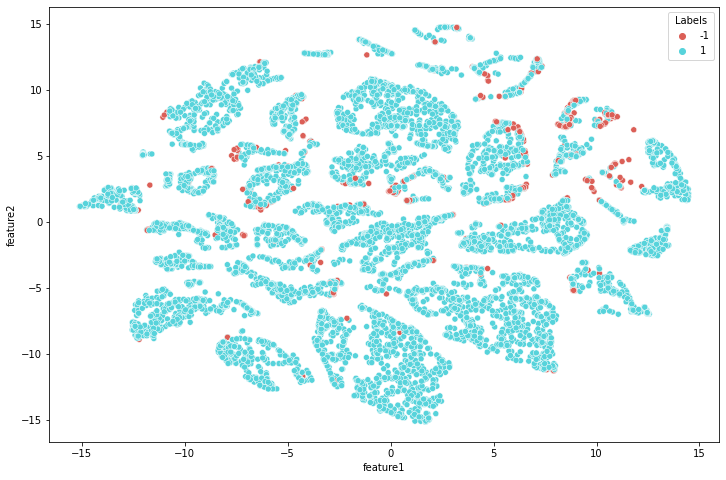

In [121]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN</a>


In [122]:
DB = DBSCAN(eps=0.65, min_samples=10).fit(df_kpca)
label_DBScan = DB.labels_

In [123]:
pd.DataFrame(label_DBScan).value_counts()

0    8950
dtype: int64

using Kernal-PCA at DBSCAN with same parameters not give any noise points 

-----------------------------------------------------------------------------------------------------------

#### NOTES
- DBSCAN gave very good result of clustering.

- Result (Score) when using dimensionality Reduction (PCA and KernalPCA) became better.

- I use different approaches to evaluate the perforamance of clustering models :
    <p> • Silhoutte Score </p>
    <p> • Davies Bouldin Score </p>
    <p> • Calinski Harabasz Score </p>
    <p> • TSNE Visualization </p>